<a href="https://colab.research.google.com/github/vedantdave77/Udacity_Nueral_network_pytorch/blob/master/Maxpooling_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data and Libraries

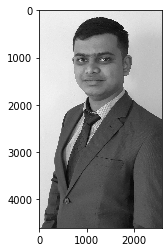

In [57]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = 'output-onlinepngtools.png'

my_image = cv2.imread(image)

gray_image = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

gray_image = gray_image.astype('float32')/255 # To convert 0-255 to 0-1. 

plt.imshow(gray_image,cmap = 'gray')
plt.show()

Define and Visulize Filters

In [91]:
import numpy as np

filter_vals = np.array([[1,0,-1], [2,0,-2 ], [1,0,-1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (3, 3)


In [0]:
# define four filters
filter_1 = filter_vals
filter_2 = np.array([[-0.9,0,1],[-2,0,2],[-1.1,0,1]])
filter_3 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

filters = np.array([filter_1, filter_2, filter_3])


Define Convolution and pooling layer

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self,weight):
        super(Net,self).__init__()
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1,4,kernel_size = (k_height,k_width), bias = False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(2,2)

    def forward(self,x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        return conv_x,activated_x, pooled_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Visulize output of each layer

In [0]:
def viz_layer(layer,n_filters):
  fig = plt.figure(figsize=(20,20))

  for i in range(n_filters):
    ax = fig.add_subplot(1,n_filters,i+1)
    ax.imshow(np.squeeze(layer[0,i].data.numpy()),cmap= 'gray')
    ax.set_title('output %s' %str(i+1))

Relu activation function

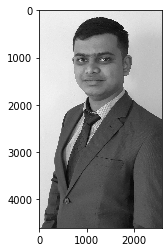

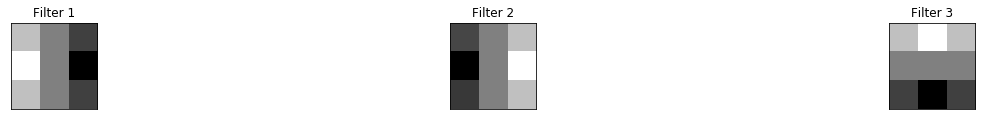

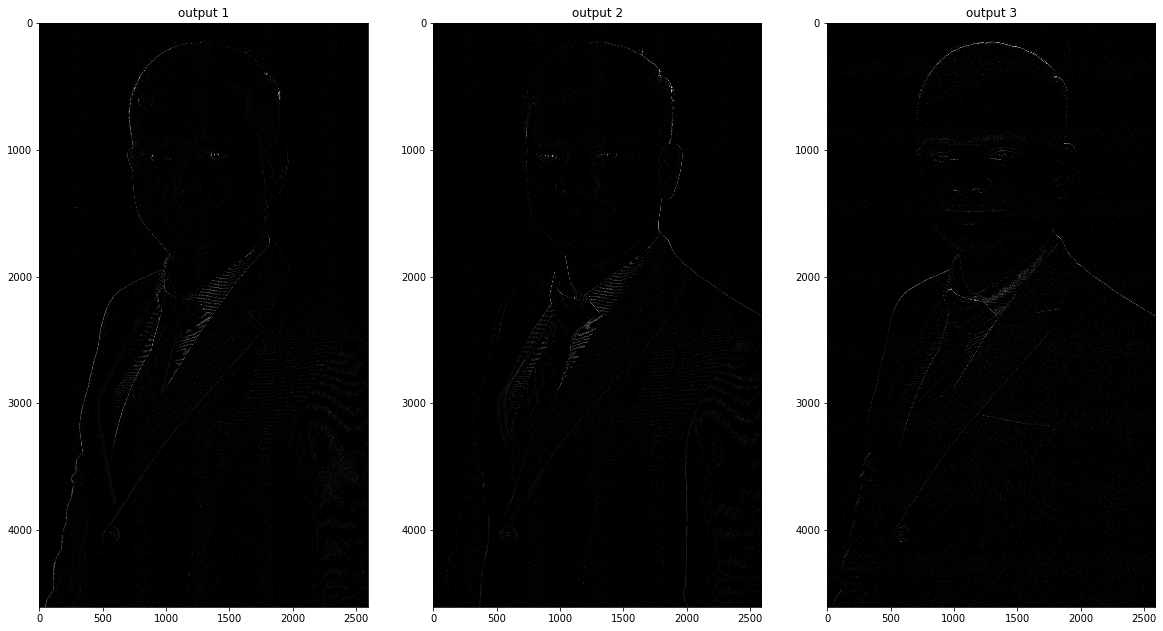

In [95]:
plt.imshow(gray_image,cmap= 'gray')

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left= 0, right= 1.5, bottom = 0.8, top = 1 , hspace = 0.05, wspace = 0.05)
for i in range(3):
  ax = fig.add_subplot(1,3, i+1,xticks=[], yticks= [])
  ax.imshow(filters[i], cmap = 'gray')
  ax.set_title('Filter %s' %str(i+1))

gray_image_tensor = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(1)

conv_layer, activated_layer, pooled_layer = model(gray_image_tensor)

viz_layer(activated_layer,3)